## Projeto 1- Simulaçao física com auto vetorização - Paulo Tozzo

## O Problema

Foi implementado uma simulação simples de choque elástico entre retângulos que estão dentro de um quadro também de forma retangular, esses retângulos podem se mover no eixo x e y. Em caso de colisão ocorre um choque perfeitamente elástico, também é possível definir um atrito dinâmico universal que irá a cada iteração diminuir a velocidade dos retângulos. Ao compilar o programa houve uma tentativa de optimizar ele usando autovectorização do gcc.

In [2]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

## Descrição dos testes
Foi realizado 3 testes de desempenho, e eles foram compilados de 4 formas diferentes, um usando a flag `O3` , outra `O0`, `O2` e o último usando `O3 ftree-vectorize mavx ffast-math`. Para medir o tempo foi usado `std::chrono::high_resolution_clock`, e para diminuir a variação de tempo os testes foi executados 100 vezes e foi feito a média,o último teste demora por volta de 80 segundos por teste assim esse só foi executado 10 vezes. O computador que executou os testes têm como hardware relevente um processador Intel core i7-5500U CPU @ 2.40GHz

## teste 1
teste simples que retangulos colidem na diagonal e logo depois com a borda.


In [3]:
with open('teste1', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_fast = [];
time_two = [];
time_zero = [];

for i in range(100):
    main = subprocess.run(["build/main"],input = data,capture_output=True)
    main_fast = subprocess.run(["build/main_fast"],input = data,capture_output=True)
    main_two = subprocess.run(["build/main_two"],input = data,capture_output=True)
    main_zero = subprocess.run(["build/main_zero"],input = data,capture_output=True)
    
    time_main.append(float((main.stderr).decode("utf-8")))
    time_fast.append(float((main_fast.stderr).decode("utf-8")))
    time_two.append(float((main_two.stderr).decode("utf-8")))
    time_zero.append(float((main_zero.stderr).decode("utf-8")))

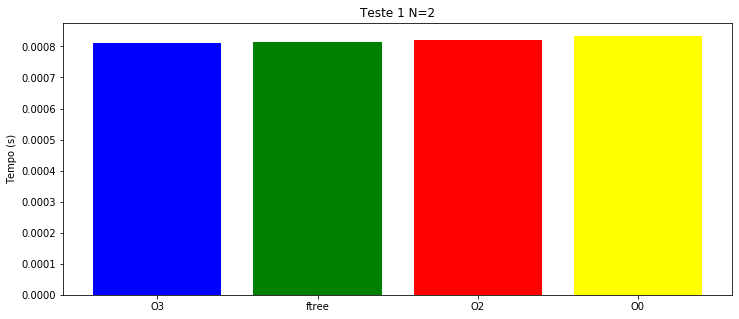

In [4]:
x = np.arange(4)
mean_list = [np.mean(time_main),np.mean(time_fast),np.mean(time_two),np.mean(time_zero)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green", "red", "yellow"])
plt.xticks(x, ["O3","ftree","O2","O0"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1 N=2")
plt.show()

A barra verde chamda de ftree é o executavel compilado com `O3 ftree-vectorize mavx ffast-math`

## teste 2
teste mais complexo que contem 13 retangulos com velocidades aleatórias e com um max_time alto. 

In [5]:
with open('final_test', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_fast = [];
time_two = [];
time_zero = [];

for i in range(100):
    main = subprocess.run(["build/main"],input = data,capture_output=True)
    main_fast = subprocess.run(["build/main_fast"],input = data,capture_output=True)
    main_two = subprocess.run(["build/main_two"],input = data,capture_output=True)
    main_zero = subprocess.run(["build/main_zero"],input = data,capture_output=True)
    
    time_main.append(float((main.stderr).decode("utf-8")))
    time_fast.append(float((main_fast.stderr).decode("utf-8")))
    time_two.append(float((main_two.stderr).decode("utf-8")))
    time_zero.append(float((main_zero.stderr).decode("utf-8")))


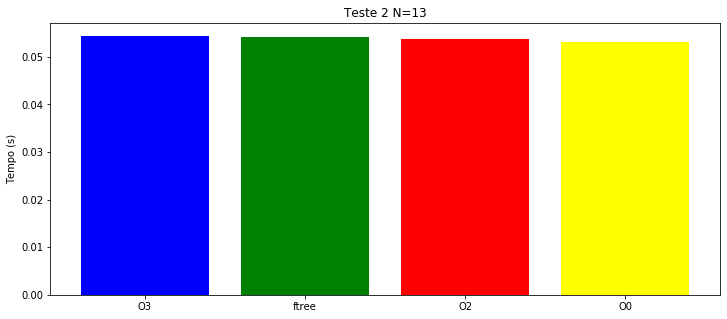

In [6]:
x = np.arange(4)
mean_list = [np.mean(time_main),np.mean(time_fast),np.mean(time_two),np.mean(time_zero)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green", "red", "yellow"])
plt.xticks(x, ["O3","ftree","O2","O0"])
plt.ylabel("Tempo (s)")
plt.title("Teste 2 N=13")
plt.show()

## teste 3
Teste com 1000 retângulos aleatórios, o arquivo de entrada foi gerado pelo programa complex_test_generator, que também pode ser encontrado nesse pasta de projeto. 

In [7]:
with open('true_test', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_fast = [];
time_two = [];
time_zero = [];

for i in range(10):
    main = subprocess.run(["build/main"],input = data,capture_output=True)
    main_fast = subprocess.run(["build/main_fast"],input = data,capture_output=True)
    main_two = subprocess.run(["build/main_two"],input = data,capture_output=True)
    main_zero = subprocess.run(["build/main_zero"],input = data,capture_output=True)
    
    time_main.append(float((main.stderr).decode("utf-8")))
    time_fast.append(float((main_fast.stderr).decode("utf-8")))
    time_two.append(float((main_two.stderr).decode("utf-8")))
    time_zero.append(float((main_zero.stderr).decode("utf-8")))


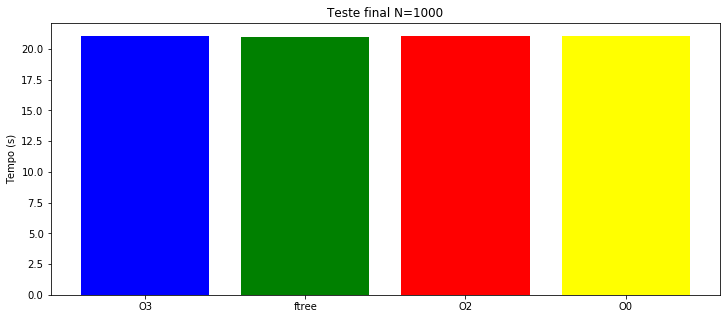

In [8]:
x = np.arange(4)
mean_list = [np.mean(time_main),np.mean(time_fast),np.mean(time_two),np.mean(time_zero)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green", "red", "yellow"])
plt.xticks(x, ["O3","ftree","O2","O0"])
plt.ylabel("Tempo (s)")
plt.title("Teste final N=1000")
plt.show()

## Conclusão
podemos ver que os tempos não tem uma alteração significativa, o que mostra que o compilador não foi capaz de otimizar esse código. Provavelmente o motivo disto ter ocorrido foi que o array usado é um array de classes, isso mostra que o gcc não consegue auto vetorizar muitas operações desse tipo de array. Se as flags `-fopt-info-vec-all`, `-fopt-info-vec-missed`,`-fopt-info-vec-all` forem usadas é possível ver que houve muita pouca auto vetorização.

- O código usa uma classe chamada square que pode ser encontrada em square.cpp e square.hpp
- primeiramente todos os inputs são lidos através do cin
- com essa informações começa o loop principal que continua até o tempo chegar em `max_iter`<br>
o loop principal é dividido em quatro partes distintas:<br>
 primeiramente são calculados as próximas posições dos objetos, sua velocidade alterada pela fricção e se eles estiverem muito lentos a simulação para<br>
 o segundo passo é calcular todas as batidas entres os retângulos e as batidas com as bordas<br>
 o terceiro passo é ver se um retângulo não bater a sua posição e velocidade são alterados, se ele bater somente a velocidade, assim não é possível ter uma posição inválida.<br>
 finalmente as informações atuais saem com um cout de acordo com o `print_freq`